1. Problem Framing / Business Understanding
2. Data Cleaning / Preparation
3. Exploratory Data Analysis
4. Feature Engineering
5. Cross Validation
6. Modeling
7. Model Evaluation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%matplotlib inline

In [3]:
rev = pd.read_csv("training-data.csv")
rev.head()
# rev.continent.unique()
# rev.query("continent == '(not set)'")["mobileDeviceBranding"]

,AudienceID,LotameID,y,Name,Type,fullVisitorId,browser,operatingSystem,operatingSystemVersion,isMobile,...,onPageTime,nextTime,user_active_days,total_visit_counts,total_unique_session,total_time_spent,time_spent_per_session,timeOnPage,GAClientId,cookie_id
0,808694,cf8031c744519d26b1d6b01a9e730bee,Male\t,RMG - 1PD - Declared - Gender - Male\t,Gender,1.000783e+19,Chrome,Android,8.1.0,True,...,0,21472,8,222,11,3928.0,330.0,21472,amp-IjR14ZTWaqMDNkrU_l4xWw,nu+hLDtTfZmLLq0a
1,808694,cf8031c744519d26b1d6b01a9e730bee,Male\t,RMG - 1PD - Declared - Gender - Male\t,Gender,1.000783e+19,Chrome,Android,8.1.0,True,...,21472,318536,8,222,11,3928.0,330.0,297064,amp-IjR14ZTWaqMDNkrU_l4xWw,nu+hLDtTfZmLLq0a
2,808694,cf8031c744519d26b1d6b01a9e730bee,Male\t,RMG - 1PD - Declared - Gender - Male\t,Gender,1.000783e+19,Chrome,Android,8.1.0,True,...,0,971115,8,222,11,3928.0,982.0,971115,amp-IjR14ZTWaqMDNkrU_l4xWw,nu+hLDtTfZmLLq0a
3,808694,cf8031c744519d26b1d6b01a9e730bee,Male\t,RMG - 1PD - Declared - Gender - Male\t,Gender,1.000783e+19,Chrome,Android,8.1.0,True,...,0,331790,8,222,11,3928.0,345.0,331790,amp-IjR14ZTWaqMDNkrU_l4xWw,nu+hLDtTfZmLLq0a
4,808694,cf8031c744519d26b1d6b01a9e730bee,Male\t,RMG - 1PD - Declared - Gender - Male\t,Gender,1.000783e+19,Chrome,Android,8.1.0,True,...,0,29064,8,222,11,3928.0,41.0,29064,amp-IjR14ZTWaqMDNkrU_l4xWw,nu+hLDtTfZmLLq0a


In [4]:
rev_f = rev.query("Type=='HHI'")
rev_f["y"].value_counts()

5000+         1436
1500-          623
1.500-5000     302
Name: y, dtype: int64

## Data Preprocessing & EDA

In [5]:
# rev_f.isnull().sum() / rev_f.shape[0] * 100
rev_f_d = rev_f.dropna()
# rev_f_d.isnull().sum()
rev_f_d.columns

Index(['AudienceID', 'LotameID', 'y', 'Name', 'Type', 'fullVisitorId',
       'browser', 'operatingSystem', 'operatingSystemVersion', 'isMobile',
       'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'screenResolution',
       'language', 'continent', 'subContinent', 'country', 'region', 'city',
       'sec', 'sub_sec', 'pageTitle', 'url', 'onPageTime', 'nextTime',
       'user_active_days', 'total_visit_counts', 'total_unique_session',
       'total_time_spent', 'time_spent_per_session', 'timeOnPage',
       'GAClientId', 'cookie_id'],
      dtype='object')

In [6]:
rev_f_d[['mobileDeviceBranding', 'mobileDeviceModel',
       'mobileDeviceInfo', 'mobileDeviceMarketingName']].value_counts()
# rev_f_d['mobileDeviceBranding'].nunique()

mobileDeviceBranding  mobileDeviceModel  mobileDeviceInfo                     mobileDeviceMarketingName
Samsung               SM-N975F           Samsung SM-N975F Galaxy Note10+      Galaxy Note10+               780
                      SM-A505F           Samsung SM-A505F Galaxy A50          Galaxy A50                   262
Huawei                YAL-L21            Huawei YAL-L21 Honor 20              Honor 20                     150
Xiaomi                Redmi Note 9S      Xiaomi Redmi Note 9S                 (not set)                     22
Huawei                MAR-LX2            Huawei MAR-LX2 Nova 4e               Nova 4e                       10
Samsung               SM-G960F           Samsung SM-G960F Galaxy S9           Galaxy S9                      8
Huawei                EML-L29            Huawei EML-L29 P20                   P20                            7
Samsung               SM-N960F           Samsung SM-N960F Galaxy Note9        Galaxy Note9                   7
        

In [7]:
rev_f_d[['continent', 'subContinent', 'country', 'region', 'city']].value_counts()

continent  subContinent    country   region                             city                 
Asia       Southeast Asia  Malaysia  Selangor                           Telok Panglima Garang    772
                                     Perak                              Ipoh                     257
                           Brunei    Brunei-Muara District              Bandar Seri Begawan      144
                           Malaysia  Federal Territory of Kuala Lumpur  Kuala Lumpur              70
                                     Selangor                           Rawang                     5
                                                                        Petaling Jaya              4
                                                                        Puchong                    4
                                                                        Kajang                     3
                                     Kedah                              Sungai Petani             

<AxesSubplot:xlabel='region,y'>

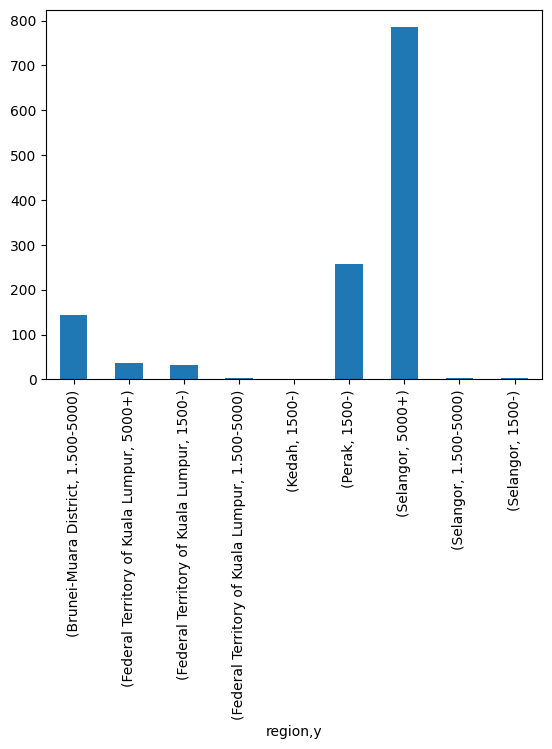

In [8]:
rev_f_d.groupby(["region"])["y"].value_counts().plot.bar()
# rev_f_d.groupby(["mobileDeviceBranding"])["y"].value_counts().plot.bar()

<AxesSubplot:xlabel='mobileDeviceBranding,y'>

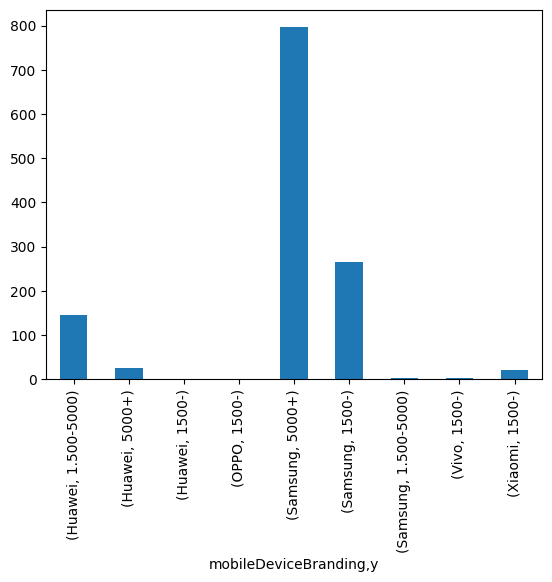

In [9]:
rev_f_d.groupby(["mobileDeviceBranding"])["y"].value_counts().plot.bar()

<AxesSubplot:>

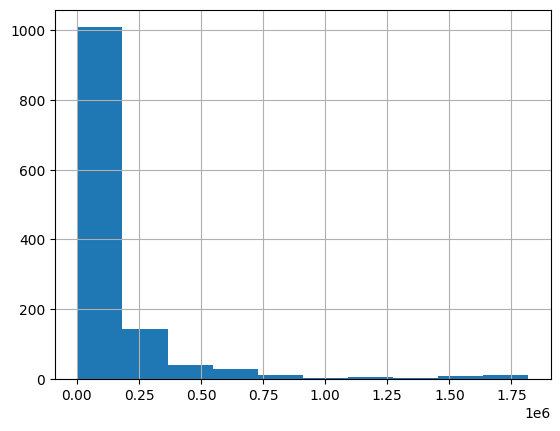

In [10]:
rev_f_d.timeOnPage.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa535037580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa535037b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5350372b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa535080100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5350803d0>],
 'means': []}

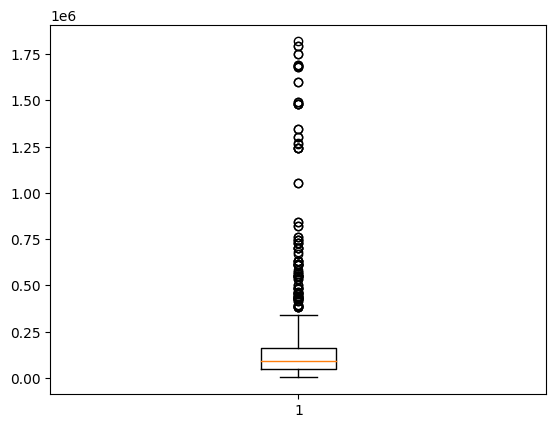

In [11]:
plt.boxplot(rev_f_d['timeOnPage'])

<AxesSubplot:>

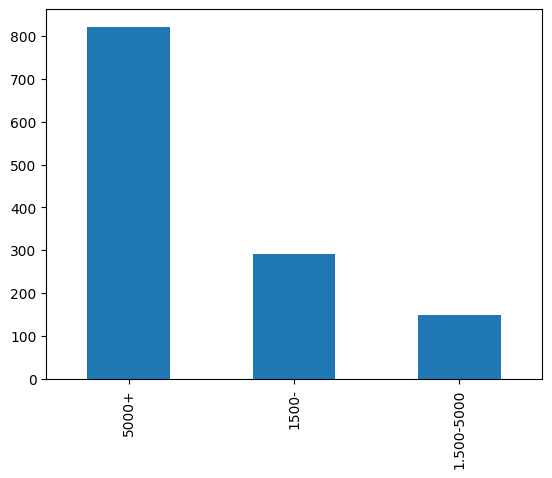

In [12]:
rev_f_d.y.value_counts().plot.bar()


<AxesSubplot:>

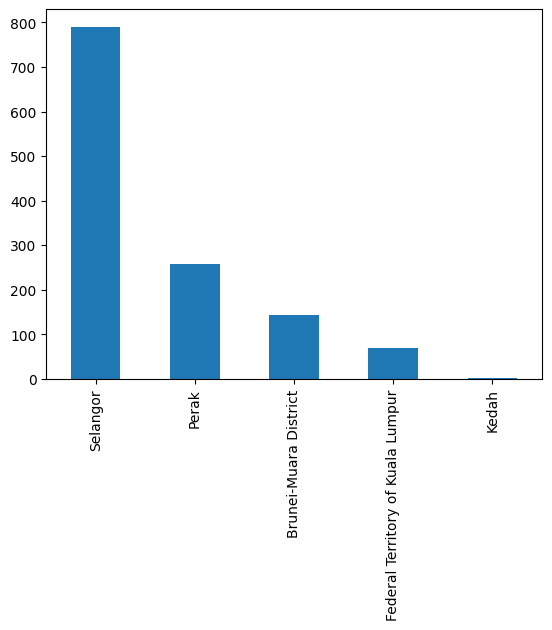

In [13]:
rev_f_d.region.value_counts().plot.bar()

<AxesSubplot:>

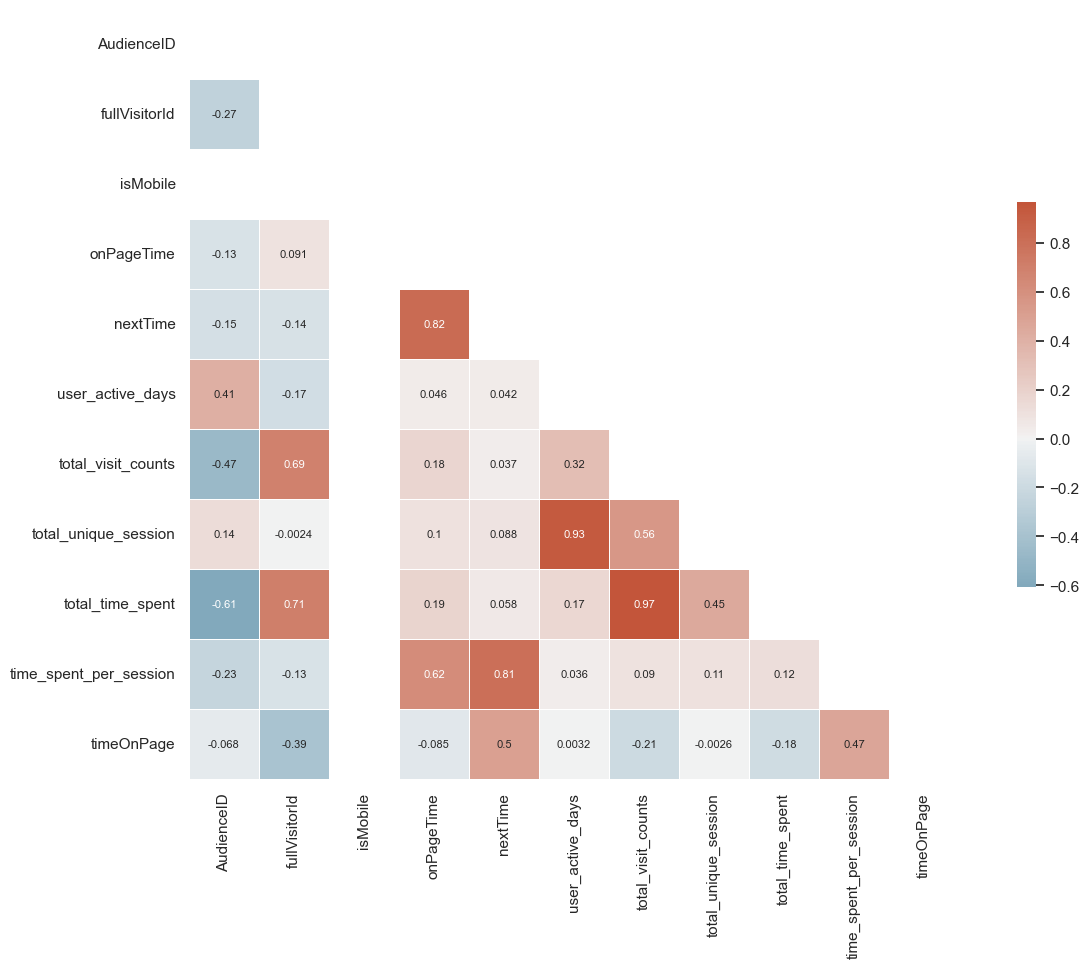

In [14]:
import seaborn as sns

#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sns.set_theme(style="white")

# Compute the correlation matrix
corr = rev_f_d.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

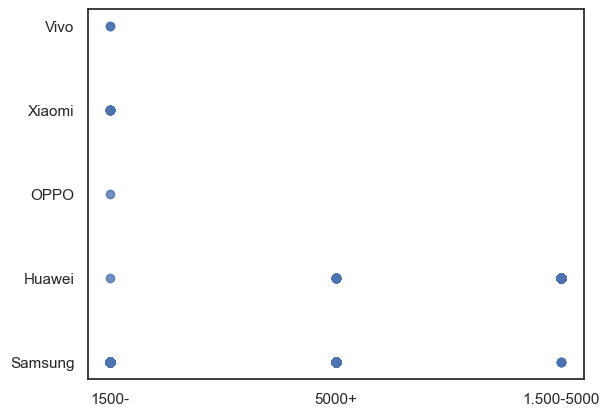

In [16]:
sns.regplot(x='y',y='mobileDeviceBranding', data = rev_f_d)

<AxesSubplot:xlabel='total_time_spent', ylabel='total_visit_counts'>

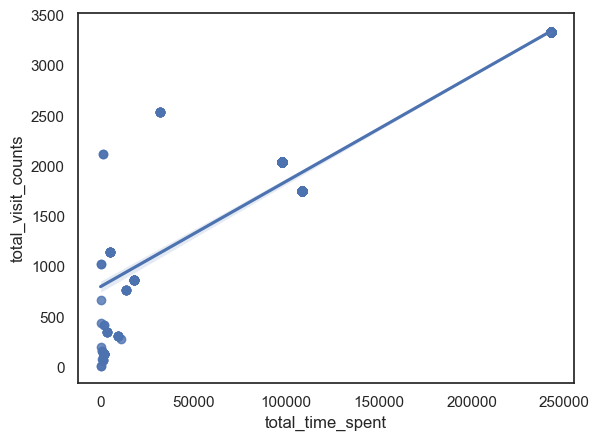

In [17]:
sns.regplot(y='total_visit_counts',x='total_time_spent', data = rev_f_d)

<AxesSubplot:xlabel='user_active_days', ylabel='total_unique_session'>

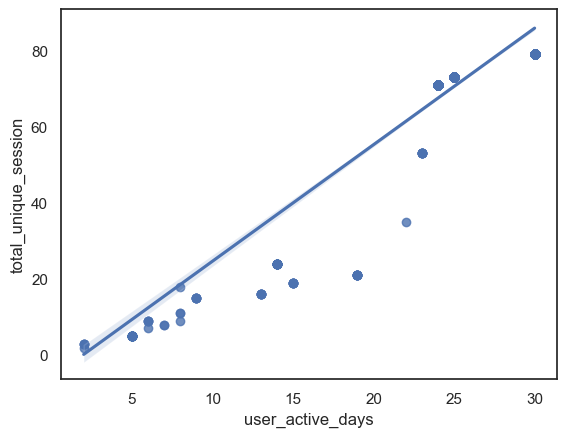

In [18]:
sns.regplot(x='user_active_days',y='total_unique_session', data = rev_f_d)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rev_f_d["mobileDeviceBranding"] = le.fit_transform(rev_f_d["mobileDeviceBranding"])
rev_f_d["region"] = le.fit_transform(rev_f_d["region"])
# rev_f_d["city"] = le.fit_transform(rev_f_d["city"])

rev_new = rev_f_d[["mobileDeviceBranding", "region", "y"]]

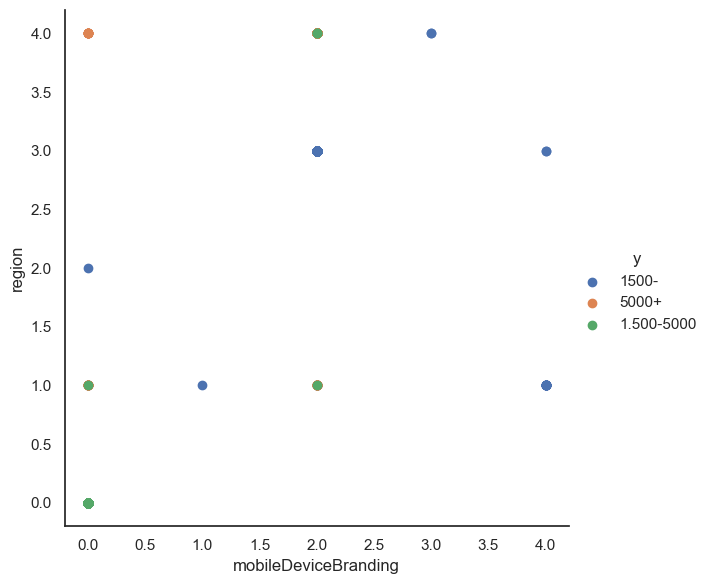

In [20]:
#checking for any correlation 
sns.FacetGrid(rev_new, hue="y",height=6).map(plt.scatter, "mobileDeviceBranding", "region").add_legend()

In [21]:
hhi_mapping = {'1500-': 0,'1.500-5000': 1,'5000+':2}
rev_new["y"] = rev_new["y"].map(hhi_mapping)

In [22]:
# rev_new.head()
# rev_new.shape
rev_new.columns

Index(['mobileDeviceBranding', 'region', 'y'], dtype='object')

In [23]:
X = rev_new[['mobileDeviceBranding','region']].values
y = rev_new[['y']].values

# Cross-Validation

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Modelling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC(kernel='linear', random_state=0)

In [26]:
lr_model.fit(X_train, y_train)
lr_y_preds = lr_model.predict(X_test)

In [27]:
dt_model.fit(X_train, y_train)
dt_y_preds = dt_model.predict(X_test)

In [28]:
rf_model.fit(X_train, y_train)
rf_y_preds = rf_model.predict(X_test)

In [29]:
svm_model.fit(X_train, y_train)
svm_y_preds = svm_model.predict(X_test)

In [30]:
lr_score = lr_model.score(X_test, y_test)
print(f"Logistic Regression Model: {lr_score:.5f}")

dt_score = dt_model.score(X_test, y_test)
print(f"Decision Tree Model: {dt_score:.5f}")

rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest Model: {rf_score:.5f}")

svm_score = svm_model.score(X_test, y_test)
print(f"Support Vector Machine Model: {svm_score:.5f}")

Logistic Regression Model: 0.97785
Decision Tree Model: 0.97468
Random Forest Model: 0.97468
Support Vector Machine Model: 0.97785


# Model Evalutation

In [31]:
from sklearn import metrics

In [32]:
print(metrics.classification_report(y_test, lr_y_preds))

print(metrics.classification_report(y_test, dt_y_preds))

print(metrics.classification_report(y_test, rf_y_preds))

print(metrics.classification_report(y_test, svm_y_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        70
           1       1.00      0.93      0.96        29
           2       1.00      0.98      0.99       217

    accuracy                           0.98       316
   macro avg       0.97      0.97      0.97       316
weighted avg       0.98      0.98      0.98       316

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        70
           1       1.00      0.93      0.96        29
           2       0.96      1.00      0.98       217

    accuracy                           0.97       316
   macro avg       0.99      0.95      0.97       316
weighted avg       0.98      0.97      0.97       316

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        70
           1       1.00      0.93      0.96        29
           2       0.96      1.00      0.98       217

    accuracy        

In [ ]:
# print(metrics.confusion_matrix(y_test, y_preds))

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# model = LogisticRegression()

In [ ]:
# model.fit(X, y)

# Accuracy

In [ ]:
# model.score(X,y)

# Make Predictions

In [ ]:
# expected = y
# predicted = model.predict(X)
# predicted

In [ ]:
# from sklearn import metrics

In [ ]:
# print(metrics.classification_report(expected, predicted))

In [ ]:
# print(metrics.confusion_matrix(expected, predicted))

# Make Predictions On Predict Dataset

In [33]:
rev_pred = pd.read_csv("predict-data.csv")

In [34]:
rev_pred["mobileDeviceBranding_txfm"] = le.fit_transform(rev_pred["mobileDeviceBranding"])
rev_pred["region_txfm"] = le.fit_transform(rev_pred["region"])
# rev_pred["city_txfm"] = le.fit_transform(rev_pred["city"])

In [36]:
X_pred = rev_pred[['mobileDeviceBranding_txfm','region_txfm']].values

In [37]:
y_rev_pred = lr_model.predict(X_pred)

rev_pred['y_rev_pred'] = y_rev_pred

rev_pred

,fullVisitorId,browser,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,...,total_unique_session,total_time_spent,time_spent_per_session,timeOnPage,GAClientId,LotamePId,cookie_id,mobileDeviceBranding_txfm,region_txfm,y_rev_pred
0,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,745.0,28544,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
1,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,854.0,228622,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
2,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,626.0,40437,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
3,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,1111.0,65774,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
4,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,222.0,47252,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060126,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,12986,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060127,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,11995,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060128,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,105.0,16991,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060129,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,11979,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0


<AxesSubplot:ylabel='mobileDeviceBranding,region,y_rev_pred'>

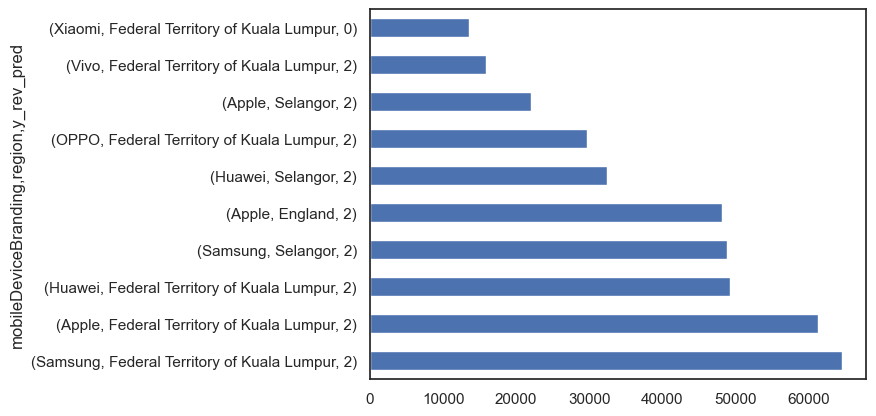

In [39]:
rev_pred.groupby(["mobileDeviceBranding","region"])["y_rev_pred"].value_counts().nlargest(10).plot.barh()

In [40]:
rev_pred_export = rev_pred.query("country == 'Malaysia' | country == 'Brunei' ")
rev_pred_export

,fullVisitorId,browser,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,...,total_unique_session,total_time_spent,time_spent_per_session,timeOnPage,GAClientId,LotamePId,cookie_id,mobileDeviceBranding_txfm,region_txfm,y_rev_pred
0,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,745.0,28544,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
1,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,854.0,228622,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
2,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,626.0,40437,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
3,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,1111.0,65774,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
4,7.210581e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,28,64249.0,222.0,47252,1678844266.1601130913,cfc2191ee705fd7e67b8fb534d9bc328,DJQ2zQvZSCmo_rMc,63,219,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060126,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,12986,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060127,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,11995,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060128,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,105.0,16991,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0
1060129,3.153439e+18,Chrome,Windows,10,False,NaN,NaN,NaN,(not set),NaN,...,5,6422.0,285.0,11979,734217182.1551341073,23d9ccde43487ebef698390104977060,LqOmAn60qXLjVKVS,63,88,0


<AxesSubplot:xlabel='y_rev_pred,mobileDeviceBranding'>

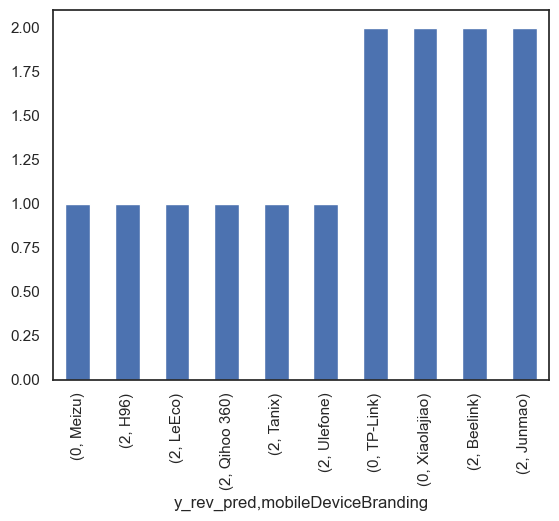

In [45]:
# rev_pred_export.groupby(["y_rev_pred"])["region"].value_counts().plot.bar()
rev_pred_export.groupby(["y_rev_pred"])["mobileDeviceBranding"].value_counts().nsmallest(10).plot.bar()

In [ ]:
# rev_pred_export.country.value_counts().plot.bar()
# rev_pred_export.to_csv("predicted-dataset.csv")